<a href="https://colab.research.google.com/github/Shuraimi/Predicting-cyber-threats-using-UNSW-NB15-dataset/blob/main/UNSW_NB15_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Intrusion Detection using UNSW-NB15 dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Problem statement
>Goal is to predict network intrusion

## 2. Data
> The data is taken from the official website and I'm using the training and testing sets for building and testing the model.

## 3. Features

## 4. Evaluation metric


## 5. Model training
1. First I'll train and use a RandomForest model to get the top 10 important features.
2. Then train on complete dataset after experimentation

## 6. Experimentation
> After RandomForest, I'll try neural network or GBMs or an ensemble on NN and RF

## Imports

In [4]:
pip install -Uqq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00


In [5]:
from fastai.tabular.all import *

In [6]:
import pandas as pd

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,precision_score,f1_score

## Exploring the train dataset

In [8]:
train_df=pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')

In [9]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


Removing the id column beacuse it can lead to data leakage.

In [10]:
train_df.drop('id',axis=1,inplace=True)

In [11]:
print("The number of rows is ",len(train_df))

The number of rows is  82332


In [12]:
train_df.shape

(82332, 44)

In [13]:
train_df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [15]:
# checking for missing values
train_df.isna().sum()

,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0
sttl,0


In [16]:
train_df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

<Axes: xlabel='attack_cat'>

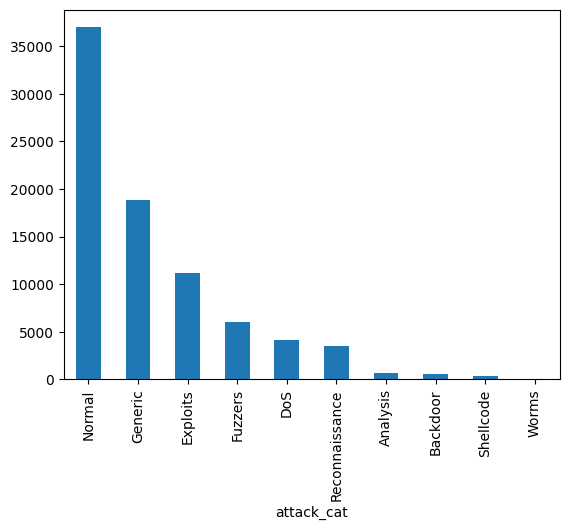

In [17]:
train_df.attack_cat.value_counts().plot(kind='bar')

In [18]:
train_df.label.unique()

array([0, 1])

## Exploring the test dataset

In [19]:
test_df=pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')

In [20]:
test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [21]:
# removing the label column and storing it for further use
label_test=test_df['label']

In [22]:
label_test

,label
0,0
1,0
2,0
3,0
4,0
...,...
82327,0
82328,0
82329,0
82330,0


In [23]:
# drop label column from test set
test_df.drop('label',axis=1,inplace=True)

In [24]:
test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,1,2,0,0,0,1,2,0,Normal
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,1,2,0,0,0,1,2,0,Normal
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,1,3,0,0,0,1,3,0,Normal
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,2,1,3,0,0,0,2,3,0,Normal
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,2,1,3,0,0,0,2,3,0,Normal


In [25]:
test_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000


In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [27]:
test_df.shape

(82332, 44)

In [28]:
total=len(train_df)+len(test_df)
total

164664

In [29]:
test_df.isna().sum()

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


### Saving the preprocessed train and test sets

In [30]:
train_df.to_csv('preprocessed_train1.csv')
test_df.to_csv('preprocessed_test1.csv')

## Building an RF

Steps:
1. Separate continuous and categorical vars
2. Use `TabularPandas` to convert categorical to numeric

In [31]:
dep_var='label'

In [32]:
help(cont_cat_split)

Help on function cont_cat_split in module fastai.tabular.core:

cont_cat_split(df, max_card=20, dep_var=None)
    Helper function that returns column names of cont and cat variables from given `df`.



In [33]:
cont,cat=cont_cat_split(train_df,dep_var=dep_var)

In [34]:
len(cont)

29

In [35]:
for c in cont:
    print(c,train_df[c].dtype)

dur float64
spkts int64
dpkts int64
sbytes int64
dbytes int64
rate float64
sload float64
dload float64
sloss int64
dloss int64
sinpkt float64
dinpkt float64
sjit float64
djit float64
stcpb int64
dtcpb int64
tcprtt float64
synack float64
ackdat float64
smean int64
dmean int64
response_body_len int64
ct_srv_src int64
ct_dst_ltm int64
ct_src_dport_ltm int64
ct_dst_sport_ltm int64
ct_dst_src_ltm int64
ct_src_ltm int64
ct_srv_dst int64


In [36]:
train_df['response_body_len'].unique()

array([   0,  184,  187, ...,  192,  147, 1492])

In [37]:
cat

['proto',
 'service',
 'state',
 'sttl',
 'dttl',
 'swin',
 'dwin',
 'trans_depth',
 'ct_state_ttl',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'is_sm_ips_ports',
 'attack_cat']

In [38]:
len(cat)

14

Checking if the datatypes of these columns are same after splitting or not

In [39]:
for c in cat:
    print(c,train_df[c].dtype)

proto object
service object
state object
sttl int64
dttl int64
swin int64
dwin int64
trans_depth int64
ct_state_ttl int64
is_ftp_login int64
ct_ftp_cmd int64
ct_flw_http_mthd int64
is_sm_ips_ports int64
attack_cat object


In [40]:
train_df['ct_flw_http_mthd'].unique()

array([ 0,  1,  9,  4,  2, 16, 12,  6])

In [41]:
train_df['label'].dtype

dtype('int64')

### Using TabularPandas

I've modified existing TabularPandas object after removing the id column from the train_df

In [42]:
procs=[Categorify]

In [43]:
help(TabularPandas)

Help on class TabularPandas in module fastai.tabular.core:

class TabularPandas(Tabular)
 |  TabularPandas(df, procs=None, cat_names=None, cont_names=None, y_names=None, y_block=None, splits=None, do_setup=True, device=None, inplace=False, reduce_memory=True)
 |  
 |  A `Tabular` object with transforms
 |  
 |  Method resolution order:
 |      TabularPandas
 |      Tabular
 |      fastcore.foundation.CollBase
 |      fastcore.basics.GetAttr
 |      fastai.data.core.FilteredBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  transform(self, cols, f, all_col=True)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Tabular:
 |  
 |  __init__(self, df, procs=None, cat_names=None, cont_names=None, y_names=None, y_block=None, splits=None, do_setup=True, device=None, inplace=False, reduce_memory=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  copy(self)
 |  
 |  decode(self)
 |  
 | 

In [44]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [45]:
to=TabularPandas(train_df, procs=procs, cat_names=cat, cont_names=cont, y_names=dep_var, splits=splits)

In [46]:
help(RandomSplitter)

Help on function RandomSplitter in module fastai.data.transforms:

RandomSplitter(valid_pct=0.2, seed=None)
    Create function that splits `items` between train/val with `valid_pct` randomly.



In [47]:
to.items.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
6525,0.546054,112,1,4,12,10,2650,612,38.457733,10,...,1,1,1,1,1,1,1,1,4,1
10642,0.000010,96,1,5,2,0,152,0,100000.000000,10,...,1,1,1,1,1,9,1,1,4,1
19883,0.000004,118,3,5,2,0,114,0,250000.000000,10,...,18,21,1,1,1,19,21,1,6,1
28479,0.324738,112,1,4,16,18,1540,1644,101.620384,5,...,1,2,1,1,1,4,9,1,7,0
70581,0.746307,112,1,4,10,6,534,268,20.098967,10,...,1,1,1,1,1,3,1,1,7,0


### Get train and valid xs and y

In [48]:
xs=to.train.xs

In [49]:
len(xs.columns)

43

### Saving the TabularPandas object as a pickle file

In [50]:
save_pickle('to.pkl',to)

### Load the to object

In [51]:
to=load_pickle('to.pkl')

In [52]:
# get train and valid xs and y
xs,y=to.train.xs,to.train.y
valid_xs,valid_y=to.valid.xs,to.valid.y

### Training a Random Forest


In [53]:
def rf(xs,y,n_estimators=40,max_features=0.5,**kwargs):
    return RandomForestRegressor(n_estimators=n_estimators,max_features=max_features,n_jobs=-1,oob_score=True).fit(xs,y)

In [54]:
Rf=rf(xs,y)

### Evaluating the model trained

In [55]:
def acc(preds,targets):
    return accuracy_score(preds,targets)


In [56]:
preds=Rf.predict(valid_xs)

In [57]:
preds[:5]

array([1., 1., 0., 1., 1.])

In [58]:
preds.dtype

dtype('float64')

In [59]:
valid_y.value_counts()

,count
label,
1,9050
0,7416


In [60]:
# convert preds to int
preds=preds.astype(int)
acc(preds,valid_y)

0.9980566014818414

In [61]:
train_df.label.value_counts()

,count
label,
1,45332
0,37000


In [62]:
119341-56000

63341

The datset is unbalanced as the number of samples having 0 and 1 differ by 63341.
Therefore i should choose a metric which handles this unbalance.

In [63]:
len(xs.columns)

43

### Evaluating on test set

Applying the same preprocessing as train set to the test set using `TabularPandas`

In [64]:
to_test=to.new(test_df)

In [65]:
to_test.process()

In [68]:
to_test.show(3)

,proto,service,state,sttl,dttl,swin,dwin,trans_depth,ct_state_ttl,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst
0,udp,-,INT,254,0,0,0,0,2,0,0,0,0,Normal,0.000011,2,0,496,0,90909.0902,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0.0,0.0,0.0,248,0,0,2,1,1,1,2,1,2
1,udp,-,INT,254,0,0,0,0,2,0,0,0,0,Normal,0.000008,2,0,1762,0,125000.0003,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0.0,0.0,0.0,881,0,0,2,1,1,1,2,1,2
2,udp,-,INT,254,0,0,0,0,2,0,0,0,0,Normal,0.000005,2,0,1068,0,200000.0051,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0.0,0.0,0.0,534,0,0,3,1,1,1,3,1,3


In [69]:
len(to_test.proto)

132

In [70]:
X_test=to_test.items

In [71]:
X_test.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat'],
      dtype='object')

In [72]:
# to view underlying numeric data
to_test.items.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.000011,118,1,5,2,0,496,0,90909.0902,...,1,1,2,1,1,1,1,2,1,7
1,2,0.000008,118,1,5,2,0,1762,0,125000.0003,...,1,1,2,1,1,1,1,2,1,7
2,3,0.000005,118,1,5,2,0,1068,0,200000.0051,...,1,1,3,1,1,1,1,3,1,7
3,4,0.000006,118,1,5,2,0,900,0,166666.6608,...,2,1,3,1,1,1,2,3,1,7
4,5,0.000010,118,1,5,2,0,2126,0,100000.0025,...,2,1,3,1,1,1,2,3,1,7


In [73]:
print("Training columns:", xs.columns)
print("Test columns:", X_test.columns)


Training columns: Index(['proto', 'service', 'state', 'sttl', 'dttl', 'swin', 'dwin',
       'trans_depth', 'ct_state_ttl', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'is_sm_ips_ports', 'attack_cat', 'dur', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'response_body_len', 'ct_srv_src',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst'],
      dtype='object')
Test columns: Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_

In [74]:
len(xs.columns),len(test_df.columns)

(43, 44)

Here i have to order the columns as per the order of columns in `xs`

In [75]:
xs.columns

Index(['proto', 'service', 'state', 'sttl', 'dttl', 'swin', 'dwin',
       'trans_depth', 'ct_state_ttl', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'is_sm_ips_ports', 'attack_cat', 'dur', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'response_body_len', 'ct_srv_src',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst'],
      dtype='object')

In [76]:
len(xs.columns)

43

In [77]:
X_test.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat'],
      dtype='object')

In [78]:
len(X_test.columns)

44

In [79]:
len(X_test)

82332

In [80]:
preds_test=Rf.predict(X_test[xs.columns])

In [81]:
# preds_test=Rf.predict(X_test.drop('id',axis=1)[xs.columns])

In [82]:
preds_test=preds_test.astype(int)

Getting accuracy

The first cell is the accuracy got before removing the id column from the train set

In [83]:
acc(preds_test,label_test)

0.9992955351503668

In [84]:
acc(preds_test,label_test)

0.9992955351503668

The simple model of RandomForest got an accuarcy score of 0.6661929747850167.

- Get feature importances
- Tune the model
- check which metrics to use for this dataset.

In [85]:
precision_score(preds_test,label_test)

0.9987205506044295

AFter removing the id column from the train set

In [86]:
precision_score(preds_test,label_test)

0.9987205506044295

In [87]:
f1_score(preds_test,label_test)

0.9993598657925523

AFter removing the id column from the train set

In [88]:
f1_score(preds_test,label_test)

0.9993598657925523

### Saving the model

In [89]:
save_pickle('RandomForest1.pkl',Rf)

## Getting feature importances

In [90]:
def feat_import(df,model):
    return pd.DataFrame(
        {
            'cols':df.columns,
            'importances':model.feature_importances_
        }
    ).sort_values(ascending=False,by='importances')

In [91]:
fi=feat_import(xs,Rf)
fi

,cols,importances
13,attack_cat,7.368538e-01
3,sttl,1.192598e-01
8,ct_state_ttl,5.537403e-02
40,ct_dst_src_ltm,1.957572e-02
39,ct_dst_sport_ltm,1.834987e-02
42,ct_srv_dst,8.971837e-03
30,tcprtt,7.487005e-03
31,synack,7.457532e-03
19,rate,7.344409e-03
18,dbytes,4.601204e-03


In [92]:
fi10=feat_import(xs,Rf)[:10]
fi10

,cols,importances
13,attack_cat,0.736854
3,sttl,0.119260
8,ct_state_ttl,0.055374
40,ct_dst_src_ltm,0.019576
39,ct_dst_sport_ltm,0.018350
42,ct_srv_dst,0.008972
30,tcprtt,0.007487
31,synack,0.007458
19,rate,0.007344
18,dbytes,0.004601


### Function to plot feature importnaces

In [93]:
def plot_fi(fi):
    fi.plot.barh(y='importances',x='cols')

<Axes: >

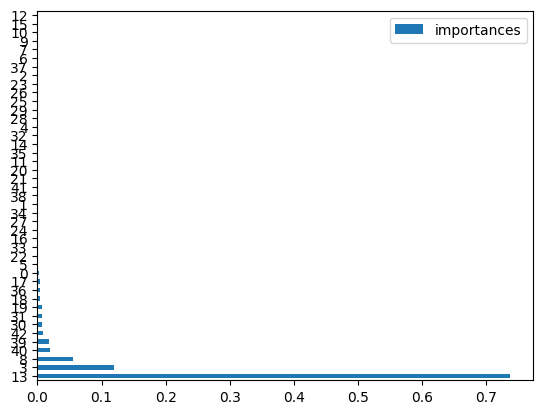

In [94]:
fi.plot(kind='barh')

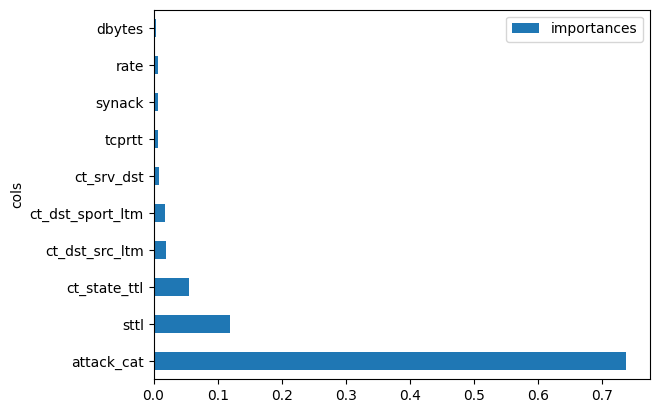

In [95]:
plot_fi(fi10)

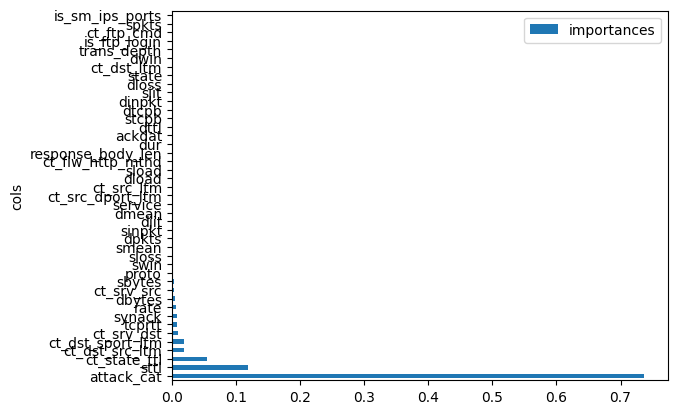

In [96]:
plot_fi(fi)